# Coursework One - Q1 - House Price Prediction - Student

Please List Members of Team and Student IDs below:

- Member 1: Alban Potteivin - 72205

- Member 2: Greta Bruno - 73702

- Member 3: Manuel Minichillo - 73711

- Member 4: Simone Gennari - 87254

Which member of the team is responsible for this notebook: 
- Greta Bruno - 73702
- Alban Poittevin - 72205

## Instructions

This is a dataset containing house prices and associated features. 

1. Load the file housing/train.csv. This is the only data you will use.
2. Visualise and analyse the data. 
3. Your aim is to predict the SalesPrice column so study its distribution.
4. Examine which features are most correlated with the sales price.
5. Look for missing data and other issues.
6. Visualise the data and look for outliers to remove.
7. Drop any columns that do not seem helpful for predicting.
8. Split the data into a 33% test and 66% training set.
9. Use a linear regression model and compare its training and test performance.
10. Use Scipy to get the p-values and to see which features are important.
11. Repeat the fitting but use a Lasso and Ridge Regression. Discuss your results.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas.api.types import is_numeric_dtype

plt.style.use("seaborn")
%matplotlib inline

# 1. Loading and Insight of the Data Frame
*Question 1*

## 1.1. Loading and Insight 

In [2]:
#import data
data_df = pd.read_csv("./housing/train.csv", index_col=0)
data_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Study of the sale price distribution
*Question 3*

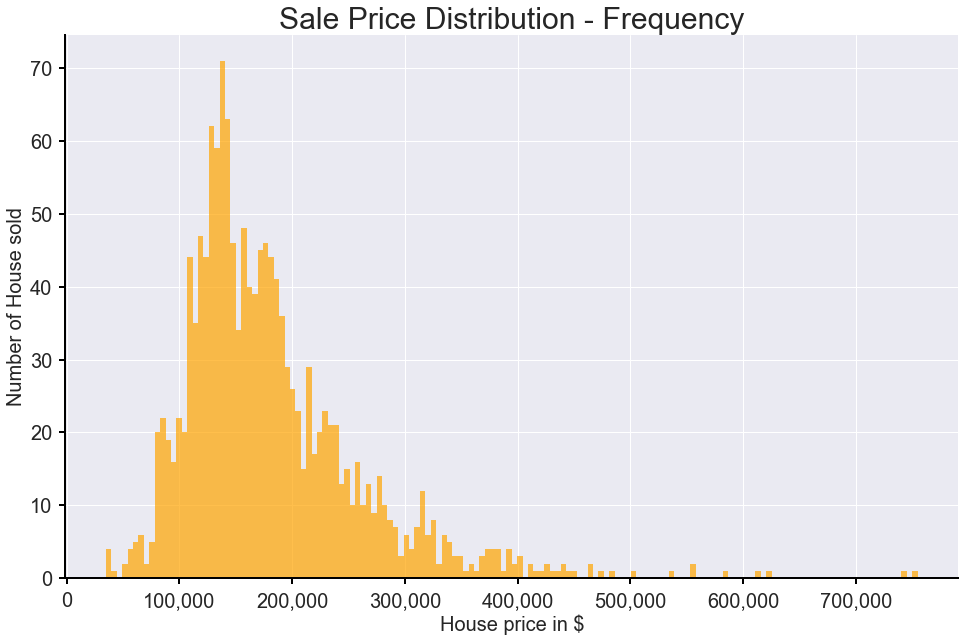

In [3]:
fig, ax = plt.subplots(figsize=(16,10))
ax.hist(data_df.SalePrice, bins=150, color="orange", alpha=0.7)
ax.set_title("Sale Price Distribution - Frequency", fontsize=30)

#Set axis
ax.set_ylabel('Number of House sold', fontsize=20)
ax.set_xlabel('House price in $', fontsize=20)

#Set format
ax.tick_params(axis='both', which='major', labelsize=20)
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Layout
#Y-axis
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)

#X-axis
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

#Tick
ax.tick_params(axis='both', direction='out', color='black', length=6, width=2)

**Observation:** The house prices seems to follow a normal distribution, so we don't need to remouve any outlier from the distribution.

# 3. Visualise and Analyse the data
*Question 2*

## 3.1 Analyse the dataset

In [4]:
#First, let's understand what the dataset is made of
with open("./housing/data_description.txt", encoding="utf-8") as f:
    for line in f:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [5]:
#Info on the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
print(data_df.shape)
print(len(str(data_df.shape))*'-')
print("Type of features & occurence")
print(len(str(data_df.shape))*'-')
print(data_df.dtypes.value_counts())

(1460, 80)
----------
Type of features & occurence
----------
object     43
int64      34
float64     3
dtype: int64


**Observation:** We see that there are a lot of feature with non numerical data (i.e type="object"), nulls and missing data. For the categorical data we will need to change them using **label encoding** or **one-hot encoding** depending on the situation. Before doing that  we need to clean and prepare the data.

## 3.2. Statistics

In [7]:
#Get the statitics
data_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.3. Visualise Features

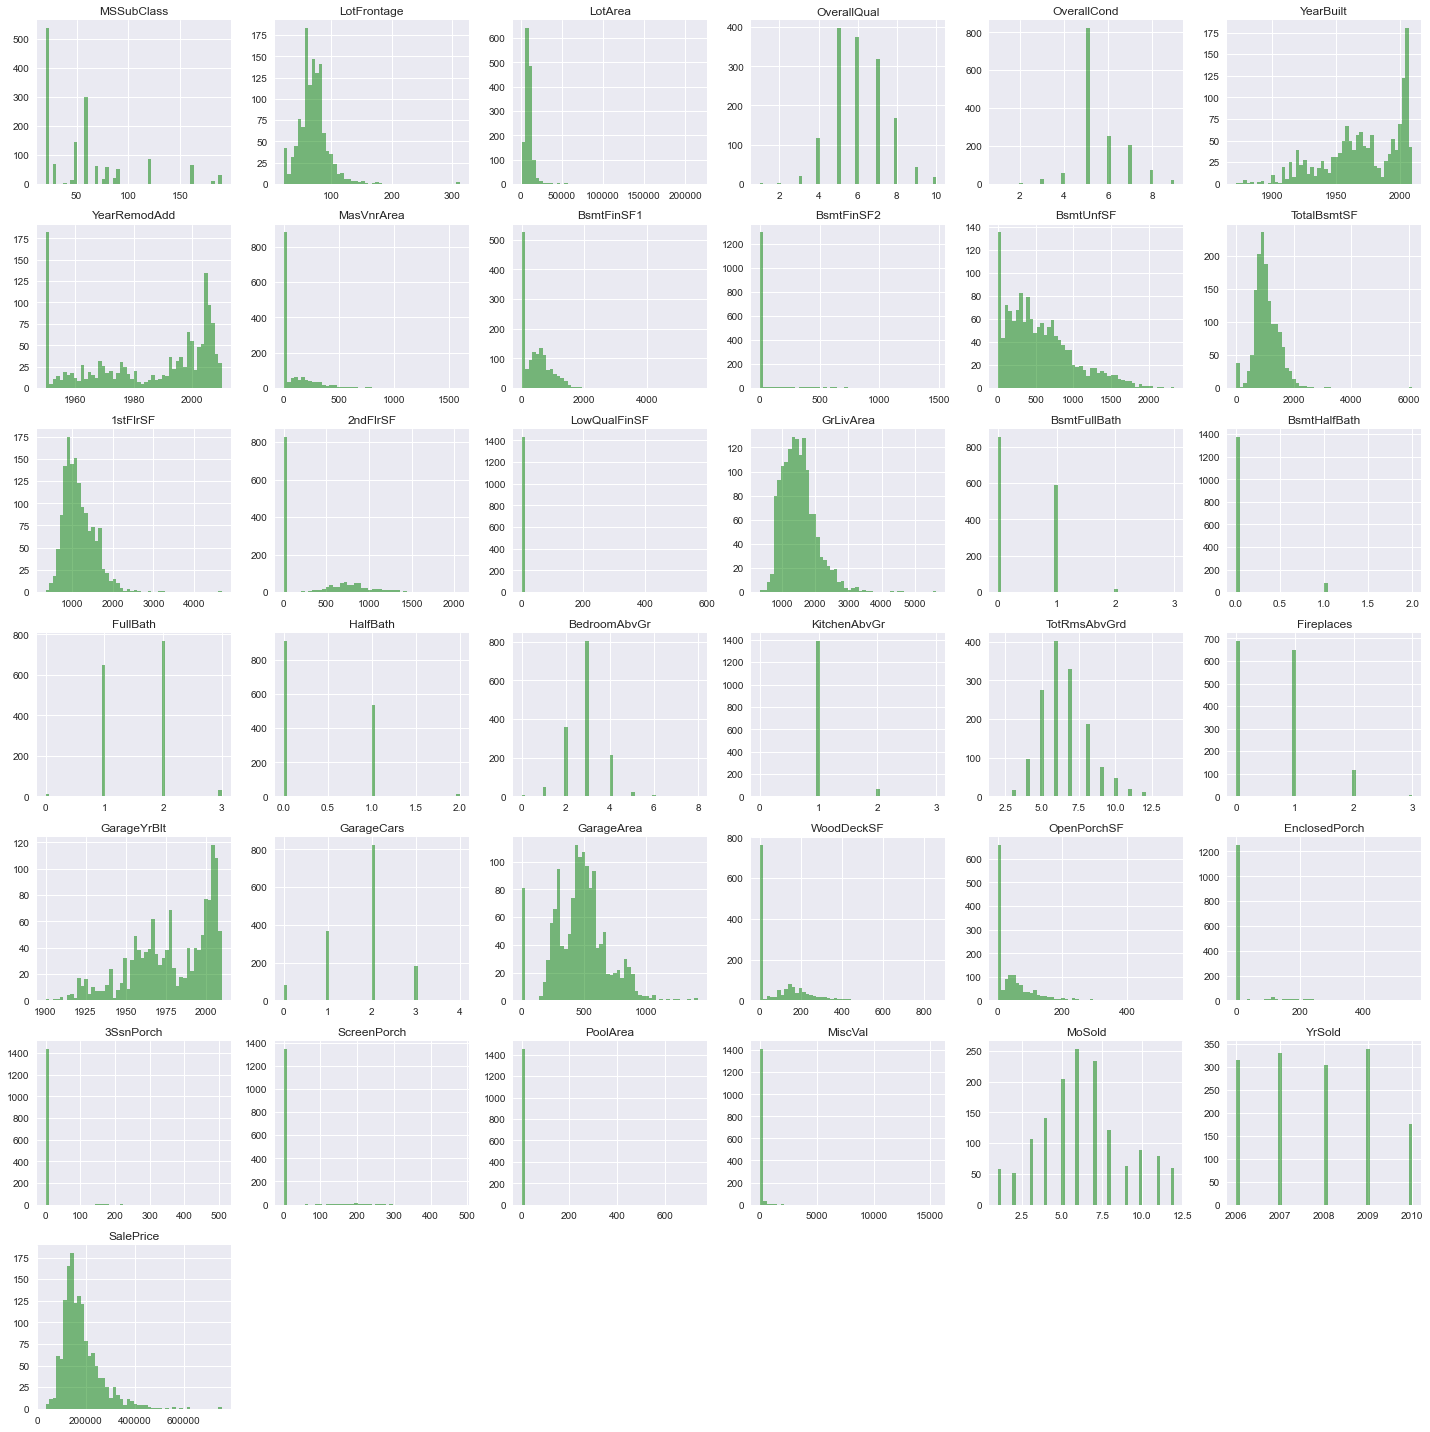

In [8]:
#Plot histogramme to understand the data
data_df.hist(bins=50, figsize=(20,20), color='green', alpha=0.5)
plt.rc('figure',titlesize=20)
plt.tight_layout();

# 4. Looking for missing data
*Question 5*

## 4.1 Filling NaN

For the following columns we noticed that there are lots on NaN values, so we looked at the data description of the dataset and we found out that these NaN have a meaning.

In [9]:
data_df["Alley"]=data_df["Alley"].fillna("No Alley Access")
data_df['BsmtQual'] = data_df['BsmtQual'].fillna("No Basement")
data_df["BsmtCond"]=data_df["BsmtCond"].fillna("No Basement")
data_df["BsmtExposure"]=data_df["BsmtExposure"].fillna("No Basement")
data_df["BsmtFinType1"]=data_df["BsmtFinType1"].fillna("No Basement")
data_df["BsmtFinType2"]=data_df["BsmtFinType2"].fillna("No Basement")
data_df["FireplaceQu"]=data_df["FireplaceQu"].fillna("No Fireplace")
data_df["GarageType"]=data_df["GarageType"].fillna("No Garage")
data_df["GarageYrBlt"]=data_df["GarageType"].fillna("No Garage")
data_df["GarageFinish"]=data_df["GarageFinish"].fillna("No Garage")
data_df["GarageQual"]=data_df["GarageQual"].fillna("No Garage")
data_df["GarageCond"]=data_df["GarageCond"].fillna("No Garage")
data_df["PoolQC"]=data_df["PoolQC"].fillna("No Pool")
data_df["Fence"]=data_df["Fence"].fillna("No Fence")
data_df["MiscFeature"]=data_df["MiscFeature"].fillna("None")

LotFrontage has lots of non valid numbers, we don't want to drop them because we will lose to many information so we group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

In [10]:
data_df["LotFrontage"] = data_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

## 4.2. Drop Nulls

In [11]:
# for MasVnrType, MasVnrArea and Electrical we drop the NaN values:
data_df.dropna(inplace=True)

In [12]:
#let's check the value again to be sure that the changes we did worked
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

## 4.3 Categorical Data
To treat the categorical data we will first remove the outliers and features that have less/no explanatory power. **See point 6.3**

# 5. Visualise the data and look for outliers to remove

## 5.1 Visualise the data

In [13]:
# What are the features left in our dataframe
data_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<ipython-input-20-d61c0641014f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(9, 6))


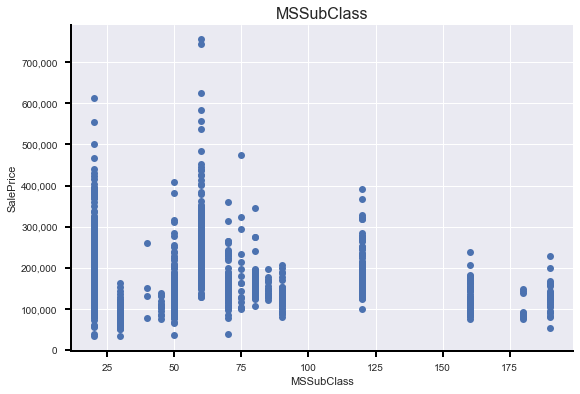

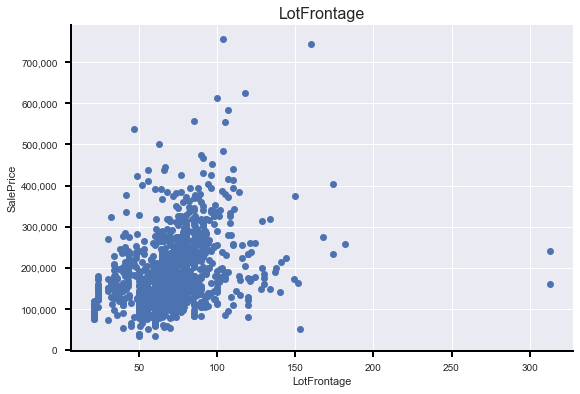

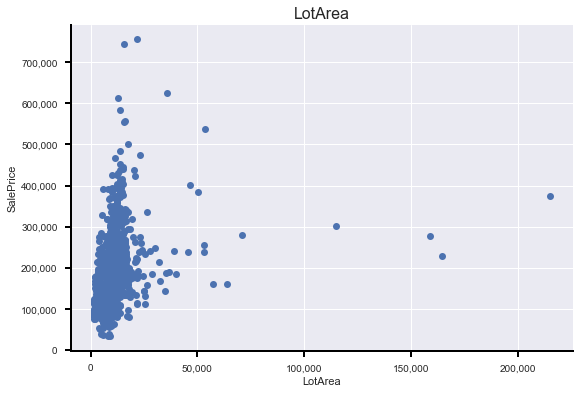

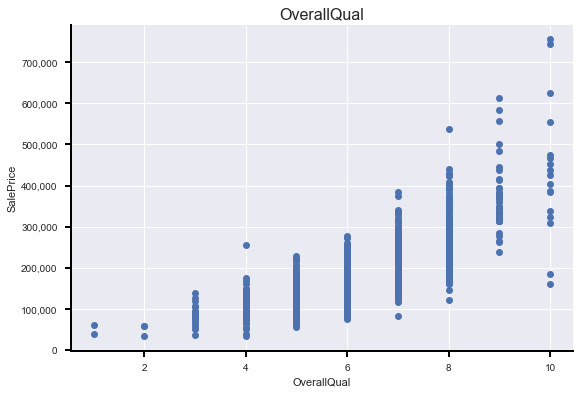

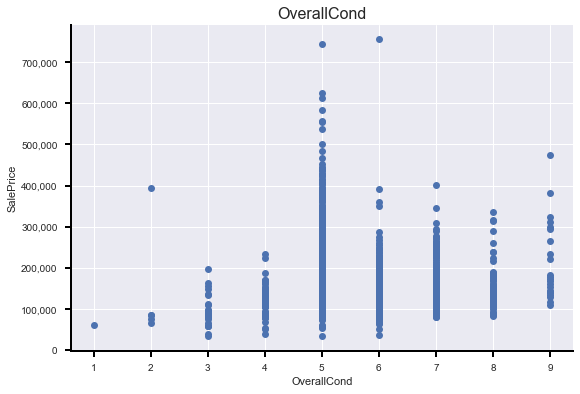

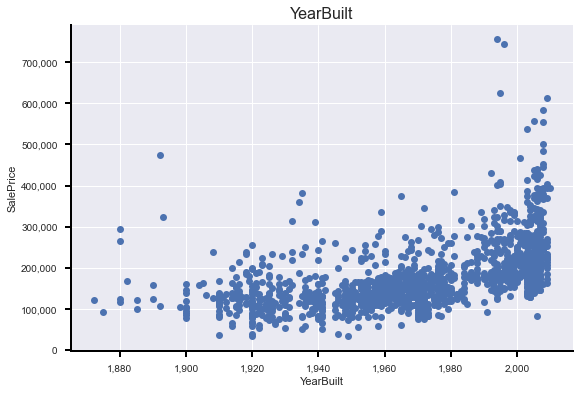

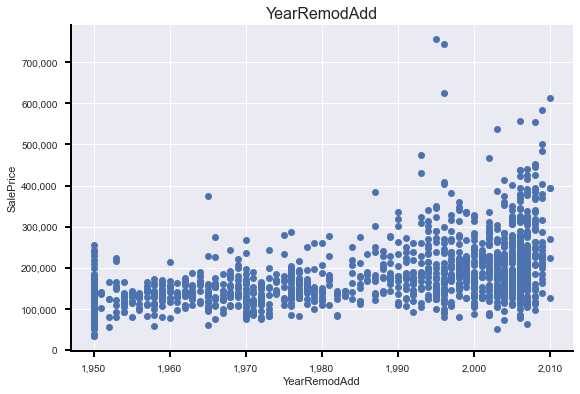

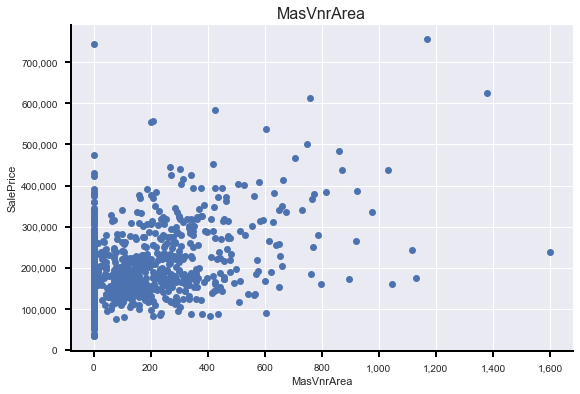

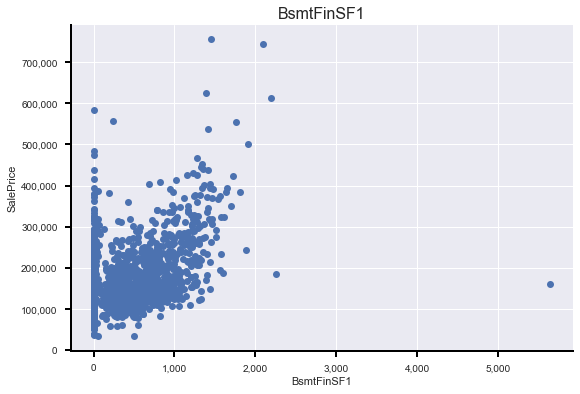

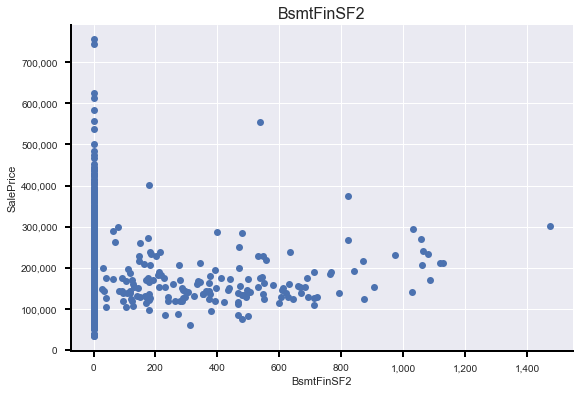

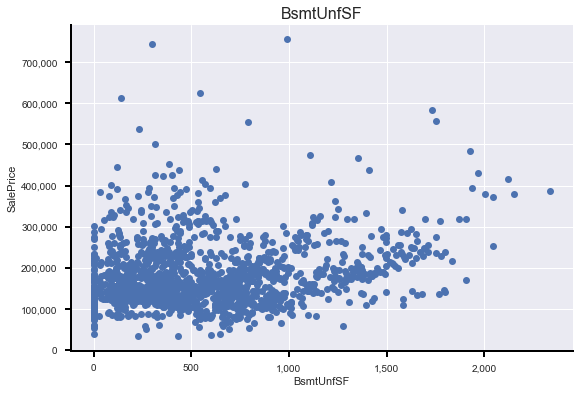

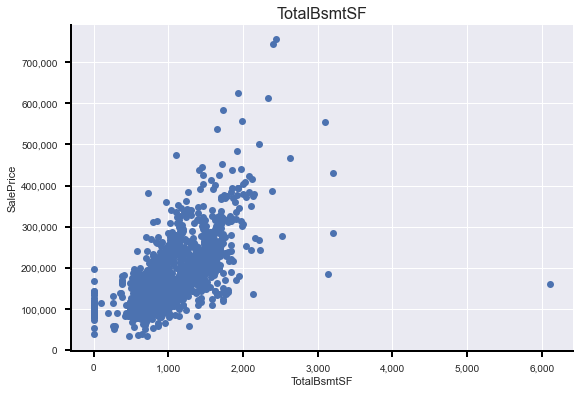

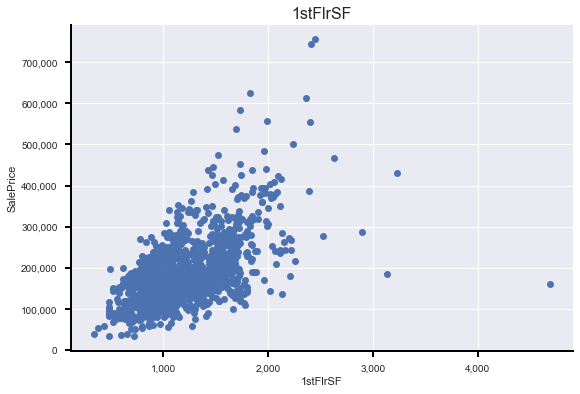

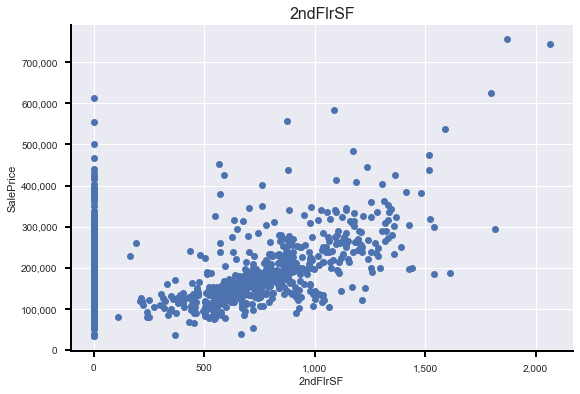

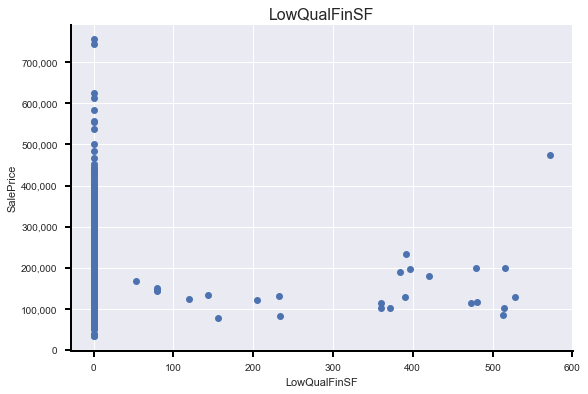

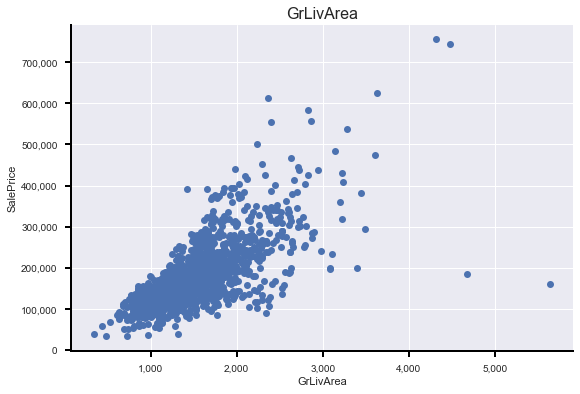

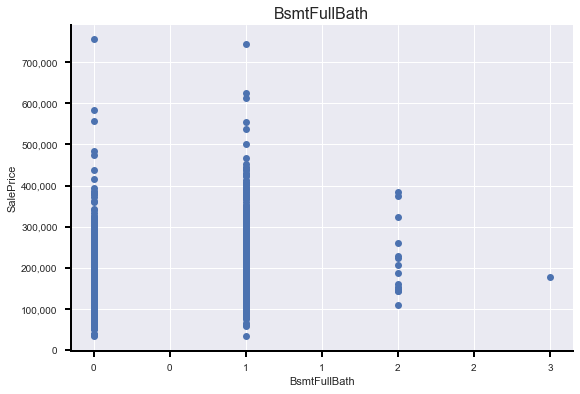

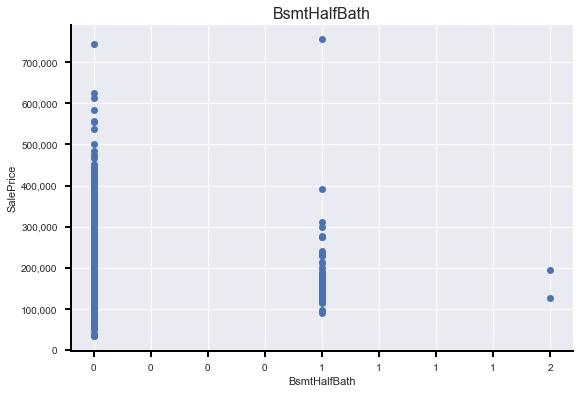

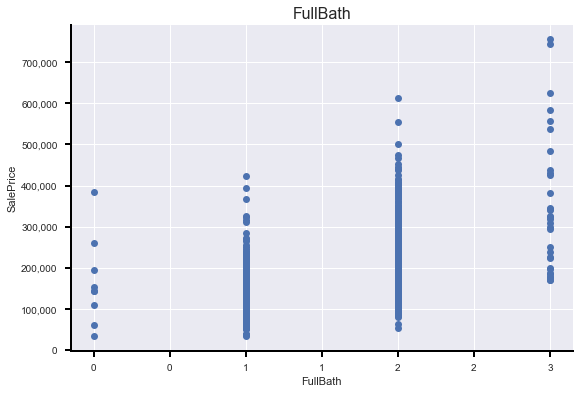

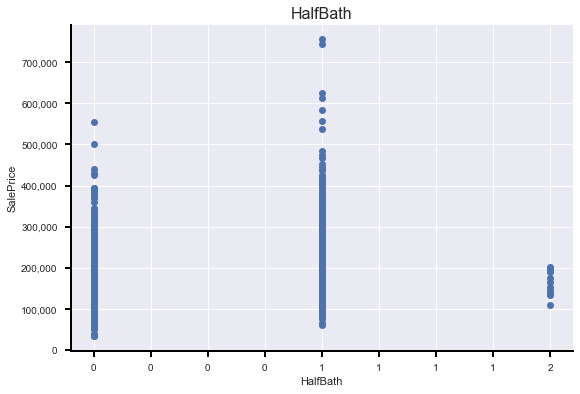

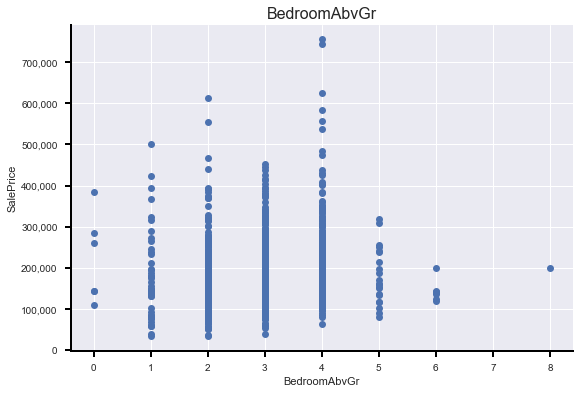

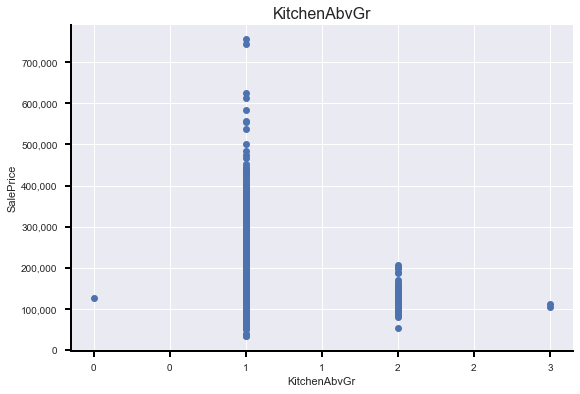

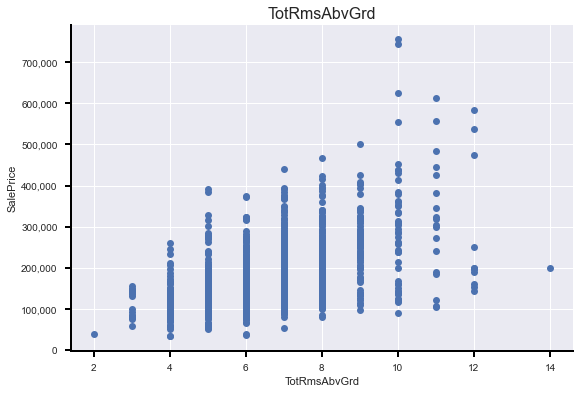

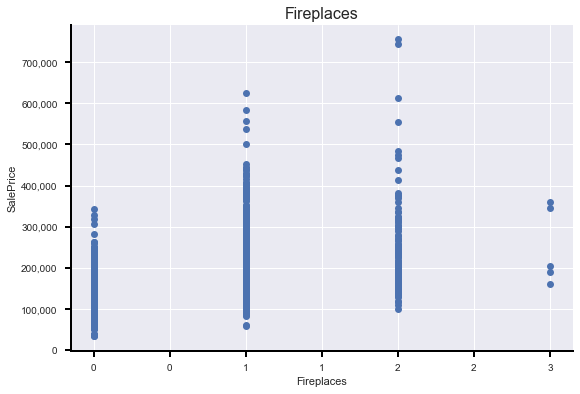

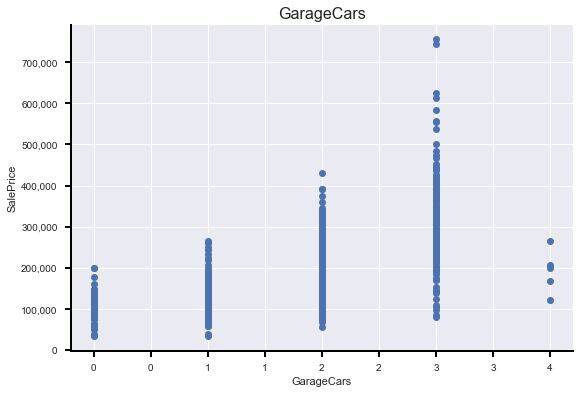

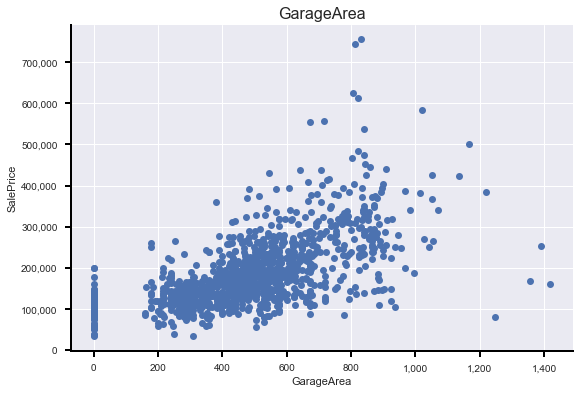

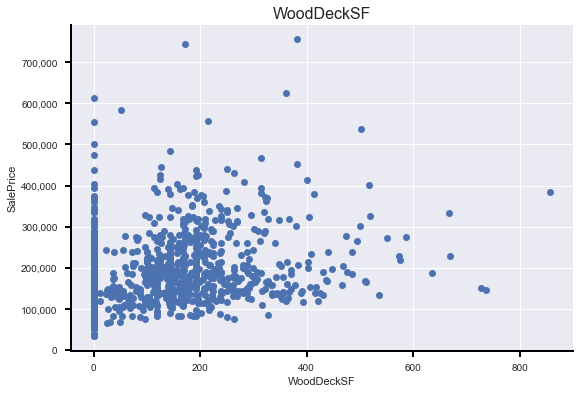

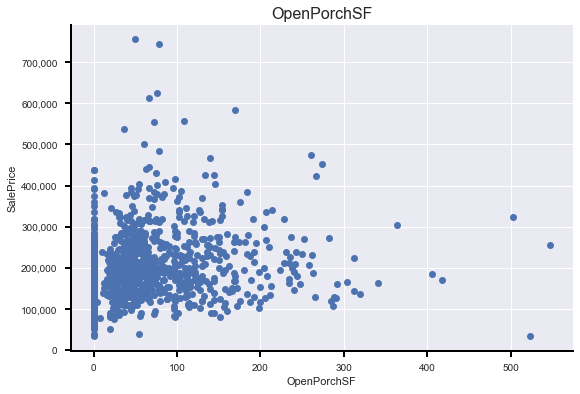

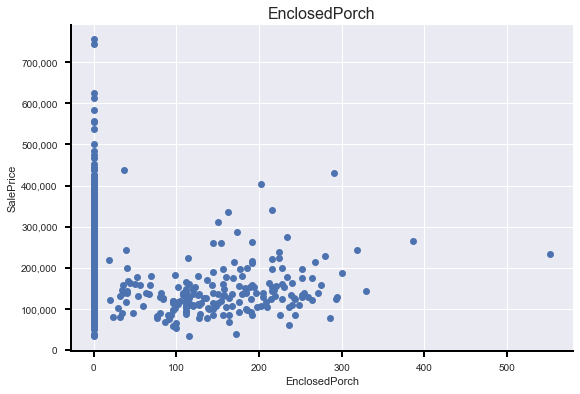

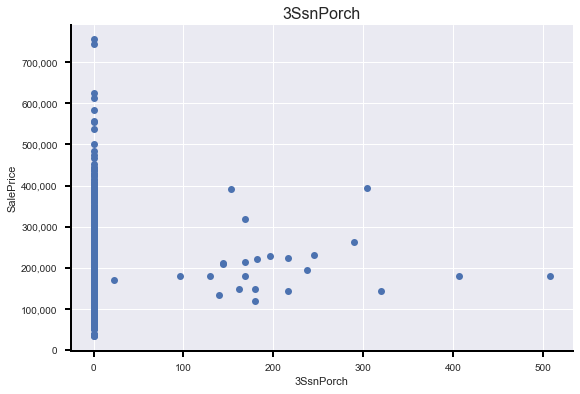

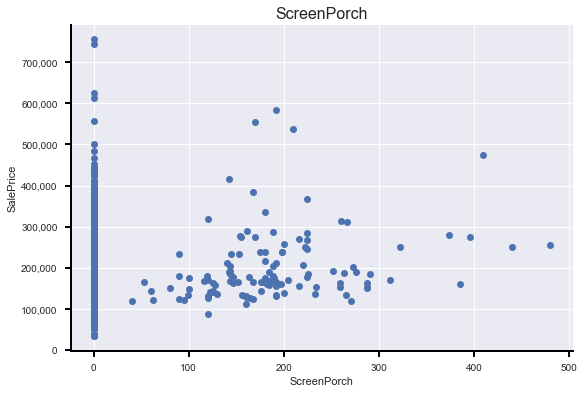

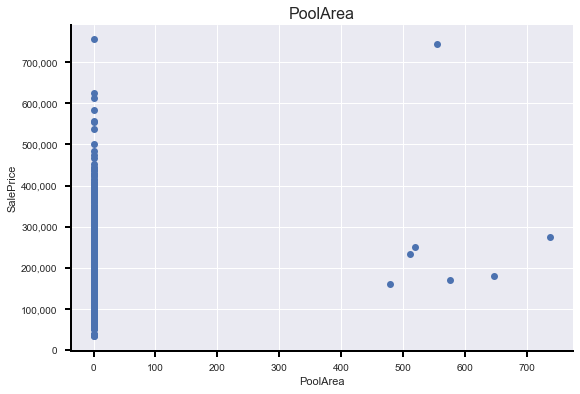

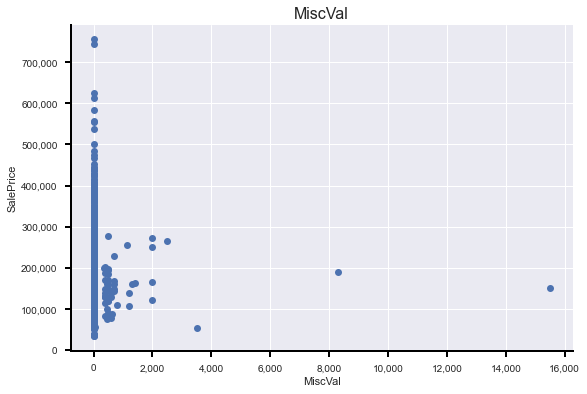

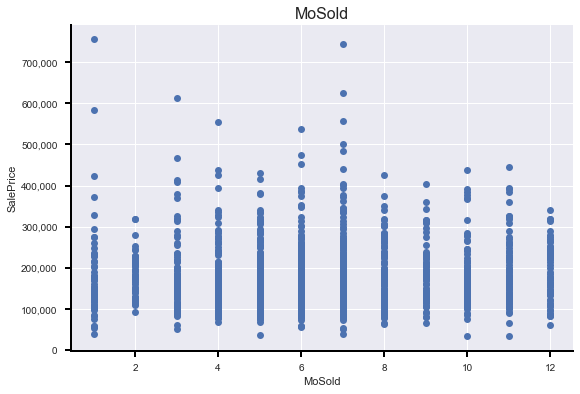

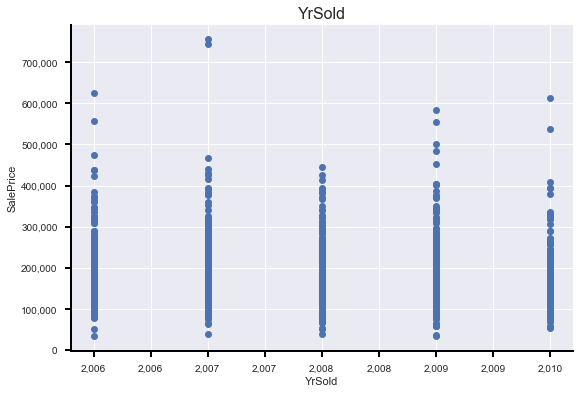

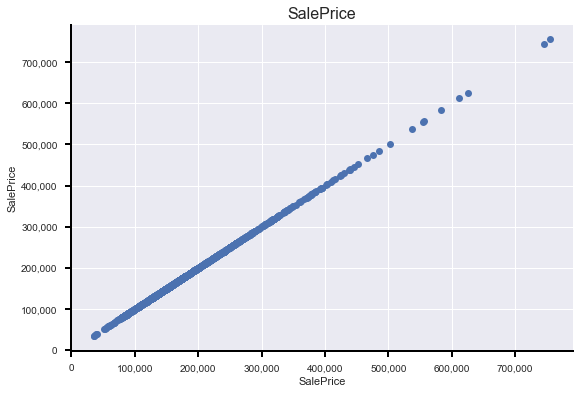

In [20]:
#Visualising by plotting
for colToPlot in data_df.columns:
    if is_numeric_dtype(data_df[colToPlot])==True:
        fig, ax = plt.subplots(figsize=(9, 6))
        ax.plot(data_df[colToPlot], data_df['SalePrice'], 'o')
        ax.set_ylabel('SalePrice')
        ax.set_xlabel(colToPlot)
        ax.set_title(colToPlot, fontsize=16)
        #Format
        ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.get_xaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        #Layout
        #Y-axis
        ax.spines['left'].set_color('black')
        ax.spines['left'].set_linewidth(2)

        #X-axis
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(2)

        #Tick
        ax.tick_params(axis='both', direction='out', color='black', length=6, width=2);

## 5.2. Remouve Outliers

In [21]:
#Looking at the graphs above we decided to remouve the following outliers:
data_df= data_df.drop(data_df[(data_df["LotFrontage"]>300) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["LotArea"]>150000) & (data_df['SalePrice']<400000)].index)
data_df= data_df.drop(data_df[(data_df["MasVnrArea"]>1500) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["BsmtFinSF1"]>5000) & (data_df['SalePrice']<200000)].index)
data_df= data_df.drop(data_df[(data_df["TotalBsmtSF"]>5000) & (data_df['SalePrice']<200000)].index)
data_df= data_df.drop(data_df[(data_df["1stFlrSF"]>4000) & (data_df['SalePrice']<200000)].index)
data_df= data_df.drop(data_df[(data_df["GrLivArea"]>5000) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["BsmtFullBath"]>2.5) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["BedroomAbvGr"]>8) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["KitchenAbvGr"]>2.5) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["TotRmsAbvGrd"]>13) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["GarageArea"]>1200) & (data_df['SalePrice']<300000)].index)
data_df= data_df.drop(data_df[(data_df["OpenPorchSF"]>400) & (data_df['SalePrice']<300000)].index)

## 5.3. Drop columns

Looking at the description of the dataframe we decided to remouve the following features since they are not good predictor of the sale price. <br><br> For example:
- **MoSold** and **YrSold** give us the information in which month and in which year houses have been sold (not useful information to predict the price of other houses). 
- For Utilities, **Pool Area** and **PoolQC** just a few houses have these features. 

For the rest of them we noticed that these features are already incorporated in others so to avoid redundancy we remouved them.

In [22]:
#removing data columns that are not good predictor of sale price:
data_df=data_df.drop(["MSSubClass"], axis=1)
data_df=data_df.drop(["Street"],axis=1)
data_df=data_df.drop(["Alley"],axis=1)
data_df=data_df.drop(["Utilities"],axis=1)
data_df=data_df.drop(["Condition2"],axis=1)
data_df=data_df.drop(["RoofMatl"],axis=1)
data_df=data_df.drop(["MasVnrArea"],axis=1)
data_df=data_df.drop(["BsmtFinType2"],axis=1)
data_df=data_df.drop(["BsmtFinSF2"], axis=1)
data_df=data_df.drop(["LowQualFinSF"], axis=1)
data_df=data_df.drop(["BsmtFullBath"], axis=1)
data_df=data_df.drop(["BsmtHalfBath"], axis=1)
data_df=data_df.drop(["KitchenAbvGr"], axis=1)
data_df=data_df.drop(["Functional"], axis=1)
data_df=data_df.drop(["GarageCond"], axis=1)
data_df=data_df.drop(["3SsnPorch"],axis=1)
data_df=data_df.drop(["ScreenPorch"],axis=1)
data_df=data_df.drop(["PoolArea"],axis=1)
data_df=data_df.drop(["PoolQC"],axis=1)
data_df=data_df.drop(["EnclosedPorch"],axis=1)
data_df=data_df.drop(["MiscVal"],axis=1)
data_df=data_df.drop(["MiscFeature"], axis=1)
data_df=data_df.drop(["MoSold"], axis=1)
data_df=data_df.drop(["YrSold"], axis=1)

# 6. Prepare data for the model
*Question 6 & 7*

## 6.1 Analysis of Features Correlation 
Let's have a first view on the data correlation, in order to understand if we are moving in the right direction.

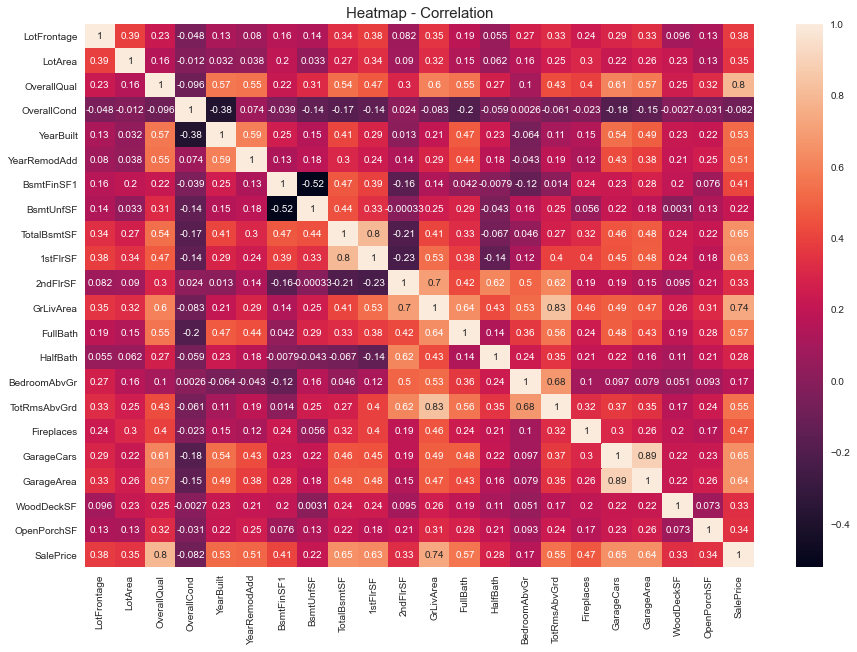

In [23]:
import seaborn as sns
df_corr = data_df.corr()

plt.figure(figsize=(15,10))
plt.title("Heatmap - Correlation", fontsize=15)
sns.heatmap(df_corr, annot=True);

In [24]:
#Let' try to get the characteristics which are the most correlated
r = 5 # first r most correlated
list_r = df_corr.SalePrice.sort_values(ascending=False)[1:r+1]
list_r

OverallQual    0.796809
GrLivArea      0.740079
TotalBsmtSF    0.651034
GarageCars     0.648134
GarageArea     0.643942
Name: SalePrice, dtype: float64

**Observation**: Only *OverallQual* and *GrLivArea* are highly correlated with Sales price (corr > 0.7)

<ipython-input-25-3e39f5c9256e>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(9, 6))


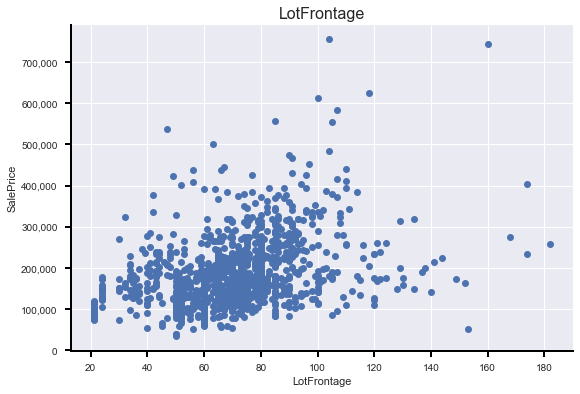

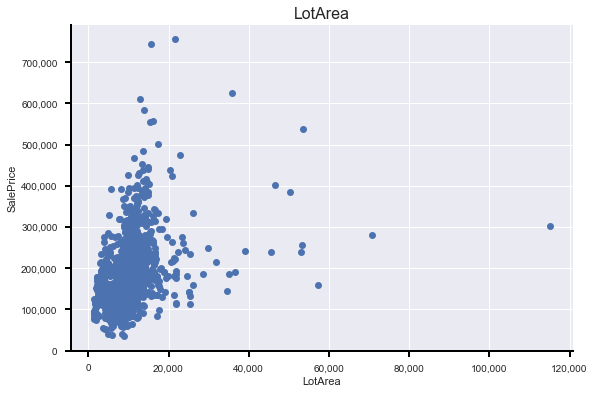

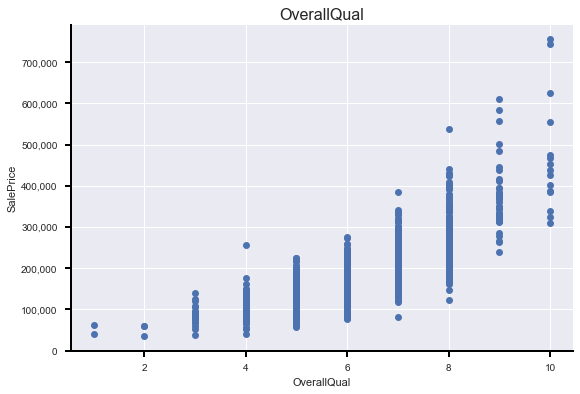

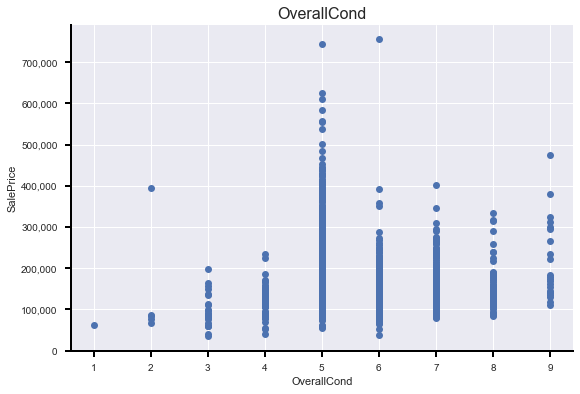

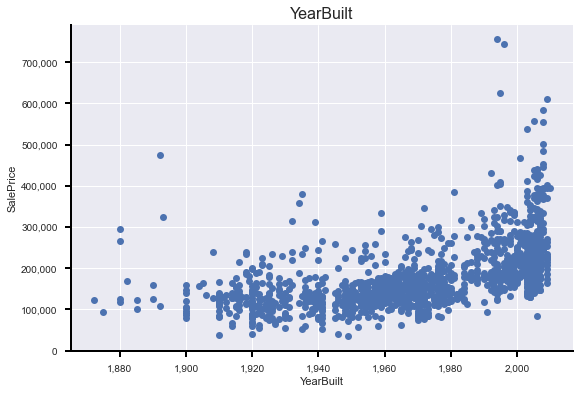

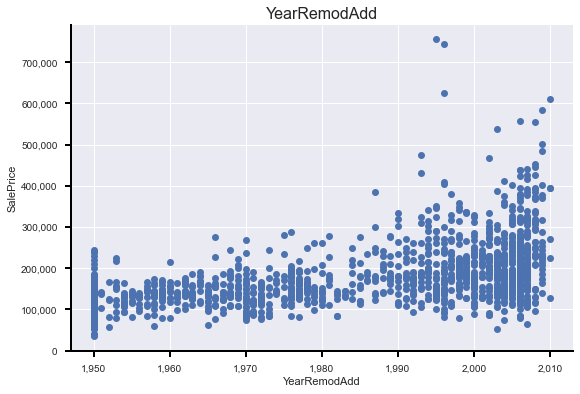

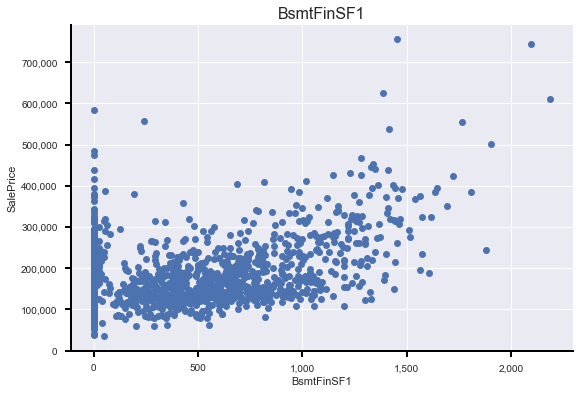

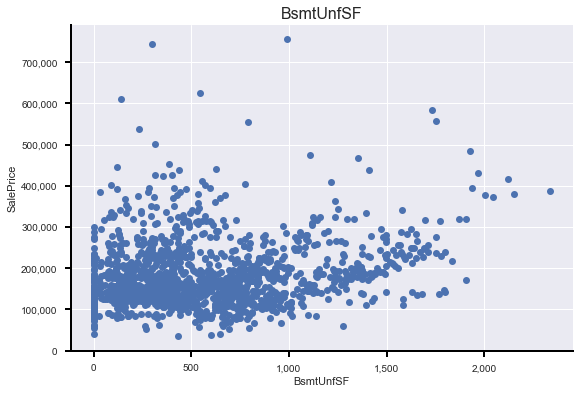

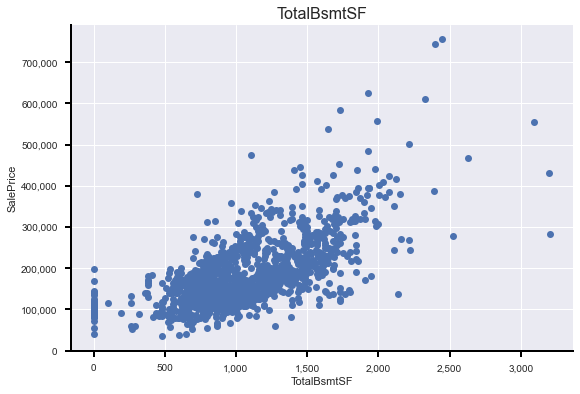

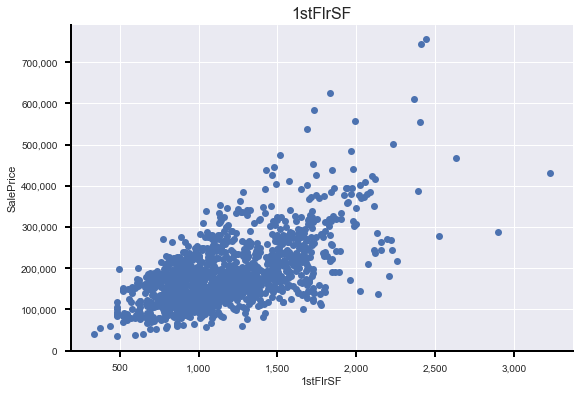

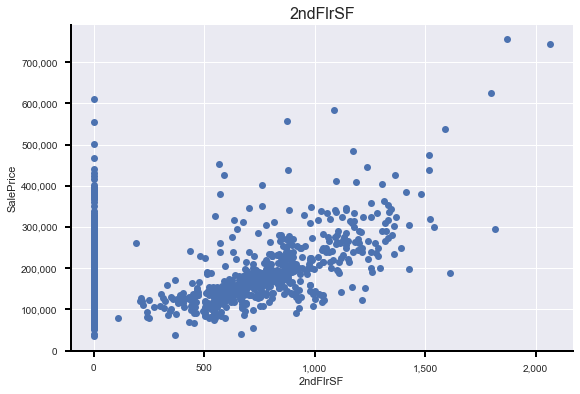

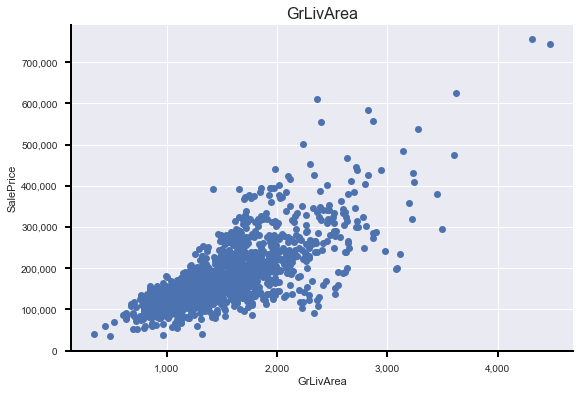

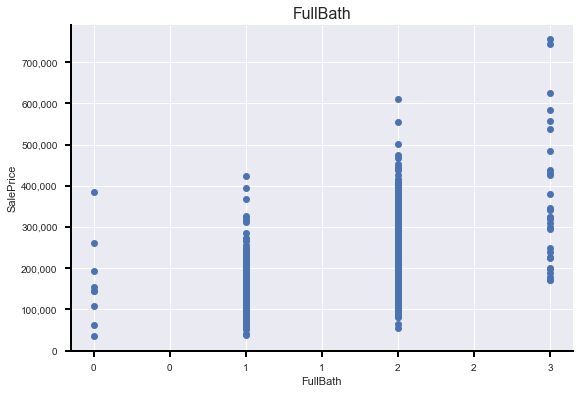

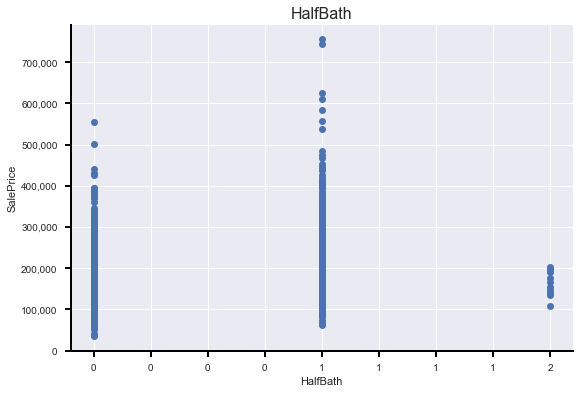

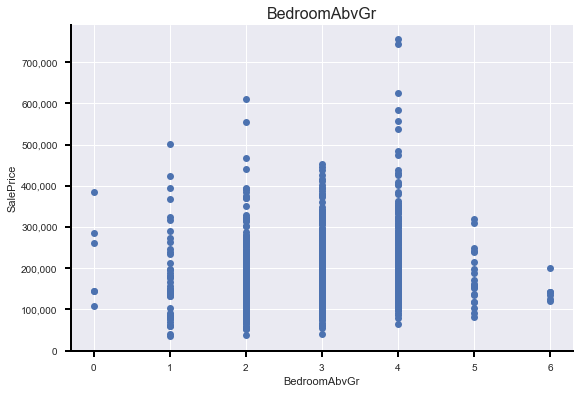

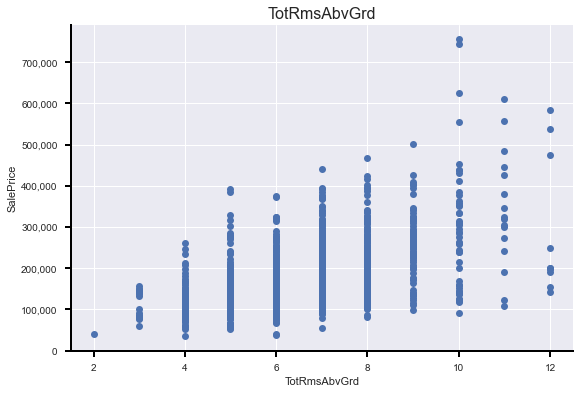

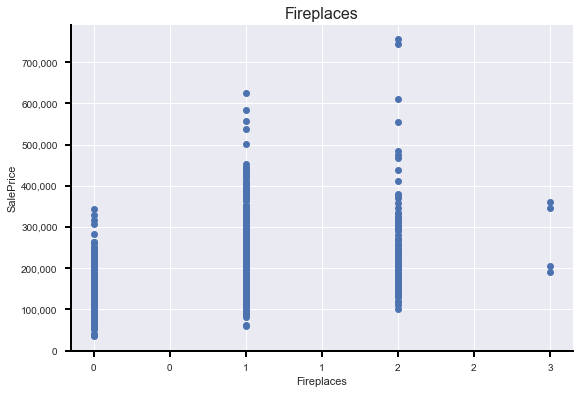

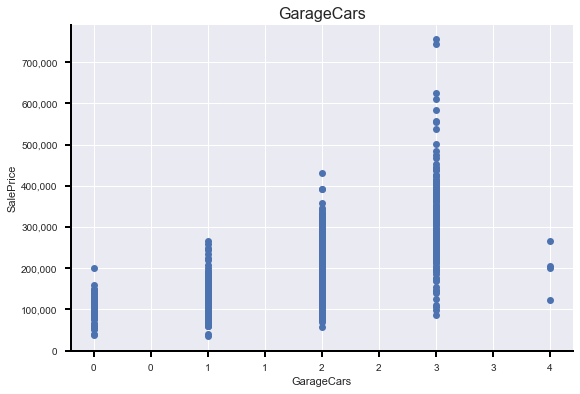

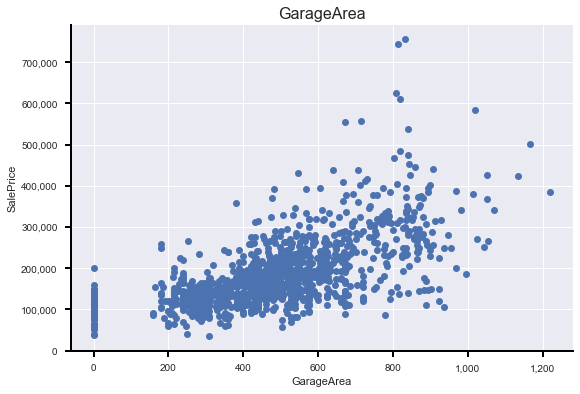

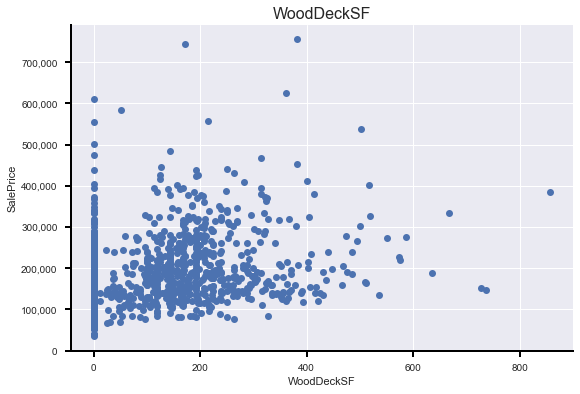

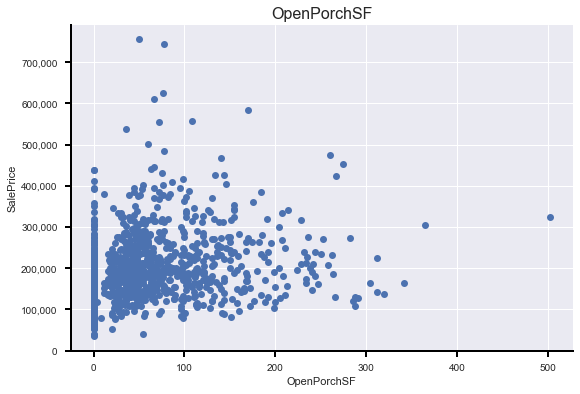

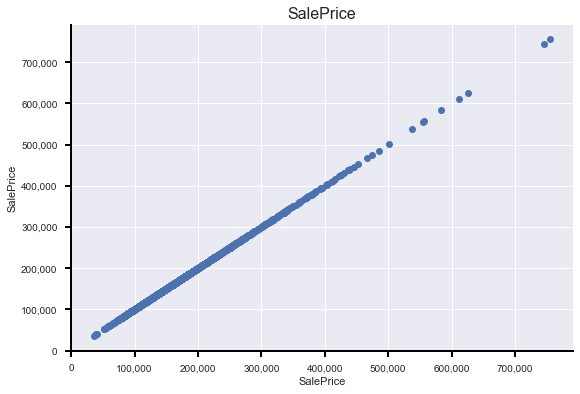

In [25]:
#Plot again to see if something need to be readjusted:
for colToPlot in data_df.columns:
    if is_numeric_dtype(data_df[colToPlot])==True:
        fig, ax = plt.subplots(figsize=(9, 6))
        ax.plot(data_df[colToPlot], data_df['SalePrice'], 'o')
        ax.set_ylabel('SalePrice')
        ax.set_xlabel(colToPlot)
        ax.set_title(colToPlot, fontsize=16)
        #Format
        ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.get_xaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        #Layout
        #Y-axis
        ax.spines['left'].set_color('black')
        ax.spines['left'].set_linewidth(2)

        #X-axis
        ax.spines['bottom'].set_color('black')
        ax.spines['bottom'].set_linewidth(2)

        #Tick
        ax.tick_params(axis='both', direction='out', color='black', length=6, width=2);

## 6.2. Remove other columns/outliers

In [26]:
#drop a couple more columns that have no tendence:
data_df=data_df.drop(["2ndFlrSF"], axis=1)
data_df=data_df.drop(["Heating"],axis=1)
data_df=data_df.drop(["Electrical"],axis=1)
data_df=data_df.drop(["Fence"],axis=1)
data_df=data_df.drop(["GarageQual"],axis=1)
data_df=data_df.drop(["ExterCond"],axis=1)
data_df=data_df.drop(["BsmtCond"],axis=1)

In [27]:
#what we have now:
data_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,2,548,Y,0,61,WD,Normal,208500
2,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,Attchd,RFn,2,460,Y,298,0,WD,Normal,181500
3,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,2,608,Y,0,42,WD,Normal,223500
4,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Detchd,Unf,3,642,Y,0,35,WD,Abnorml,140000
5,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,Attchd,RFn,3,836,Y,192,84,WD,Normal,250000


In [28]:
#New look at the info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 1 to 1460
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1434 non-null   object 
 1   LotFrontage    1434 non-null   float64
 2   LotArea        1434 non-null   int64  
 3   LotShape       1434 non-null   object 
 4   LandContour    1434 non-null   object 
 5   LotConfig      1434 non-null   object 
 6   LandSlope      1434 non-null   object 
 7   Neighborhood   1434 non-null   object 
 8   Condition1     1434 non-null   object 
 9   BldgType       1434 non-null   object 
 10  HouseStyle     1434 non-null   object 
 11  OverallQual    1434 non-null   int64  
 12  OverallCond    1434 non-null   int64  
 13  YearBuilt      1434 non-null   int64  
 14  YearRemodAdd   1434 non-null   int64  
 15  RoofStyle      1434 non-null   object 
 16  Exterior1st    1434 non-null   object 
 17  Exterior2nd    1434 non-null   object 
 18  MasVnrTy

##  6.3 Treat Categorical Data

### 6.3.1 One-Hot Encoding
We are going to rename the columns and create dummy feature 

In [29]:
#Let's create a copy of the current dataframe data_df
data_two = data_df.copy(deep=True)

#loop throuhg the categorical data i.e dtype=object
for col_to_plot in data_two.dtypes[data_two.dtypes=="object"].index:
        one_hot = pd.get_dummies(data_df[col_to_plot])
        col_hot_names = list(one_hot.columns)
        for hot_cursor in col_hot_names:
            one_hot = one_hot.rename(columns={hot_cursor:col_to_plot+ " - " + hot_cursor})
        data_two = data_two.join(one_hot)
        data_two = data_two.drop(col_to_plot, axis=1)

In [31]:
#Check we have no type object
data_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 1 to 1460
Columns: 210 entries, LotFrontage to SaleCondition - Partial
dtypes: float64(1), int64(20), uint8(189)
memory usage: 551.1 KB


**Observation**: There are no more categorical data.

### 6.3.2 Most correlated features with adjusted data

In [33]:
#let's calculate again the correlation with Sale Price but now with the adjusted data:
list_corr_up = list(data_two.corr(method='pearson').SalePrice[data_two.corr(method='pearson').SalePrice>0.5].index)
list_corr_down = list(data_two.corr(method='pearson').SalePrice[data_two.corr(method='pearson').SalePrice<-0.5].sort_values().index)
print(data_two.corr(method='pearson').SalePrice[data_two.corr(method='pearson').SalePrice>0.5].sort_values(ascending=False))
print(15*'-')
print(data_two.corr(method='pearson').SalePrice[data_two.corr(method='pearson').SalePrice<-0.5].sort_values())

SalePrice             1.000000
OverallQual           0.796809
GrLivArea             0.740079
TotalBsmtSF           0.651034
GarageCars            0.648134
GarageArea            0.643942
1stFlrSF              0.631991
FullBath              0.565304
BsmtQual - Ex         0.558919
TotRmsAbvGrd          0.546258
YearBuilt             0.526688
YearRemodAdd          0.511112
KitchenQual - Ex      0.509168
Foundation - PConc    0.504441
Name: SalePrice, dtype: float64
---------------
ExterQual - TA     -0.594630
KitchenQual - TA   -0.522784
Name: SalePrice, dtype: float64


In [34]:
#These features are the most correlated (negatively and positively) with SalePrice
final_data = data_two[list_corr_up + list_corr_down]

In [35]:
#Let's remouve also GarageCars since it is redundant (we can keep GarageArea)
final_data.drop(["GarageCars"], axis=1, inplace=True)

#Final dataset:
final_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 1 to 1460
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   OverallQual         1434 non-null   int64
 1   YearBuilt           1434 non-null   int64
 2   YearRemodAdd        1434 non-null   int64
 3   TotalBsmtSF         1434 non-null   int64
 4   1stFlrSF            1434 non-null   int64
 5   GrLivArea           1434 non-null   int64
 6   FullBath            1434 non-null   int64
 7   TotRmsAbvGrd        1434 non-null   int64
 8   GarageArea          1434 non-null   int64
 9   SalePrice           1434 non-null   int64
 10  Foundation - PConc  1434 non-null   uint8
 11  BsmtQual - Ex       1434 non-null   uint8
 12  KitchenQual - Ex    1434 non-null   uint8
 13  ExterQual - TA      1434 non-null   uint8
 14  KitchenQual - TA    1434 non-null   uint8
dtypes: int64(10), uint8(5)
memory usage: 170.2 KB


C:\Users\banba\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 6.4. Feature Scaling: MinMax Scaling 
**Observation** We transform features into a similar magnitude using MinMax Scaling. Values will be rescaled to zero and one in order to avoid extreme Thetas.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
#Loop on the int64 because all the dummy variable have a type uint8 (don't want to scale them)
for feature in list(final_data.dtypes[final_data.dtypes == "int64"].index):
    final_data[feature] = MinMaxScaler().fit_transform(final_data[feature].values.reshape(-1,1));

<Figure size 1440x1800 with 0 Axes>

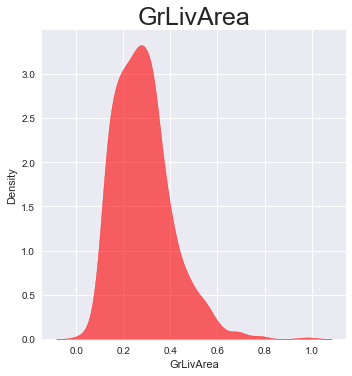

In [39]:
#Check that the value were rightly scaled with one example (here: "GrLivArea")
plt.figure(figsize=(20,25))
sns.displot(final_data.iloc[:,5], color="red", alpha=0.6, kind="kde", fill=True)
plt.title(final_data.iloc[:,5].name, fontsize=25);

## 6.5. Analysis of P-values
*Question 10*

In [40]:
from scipy import stats

In [41]:
X_pvalue = final_data.drop("SalePrice", axis=1).copy(deep=True)
pvaluel=[[i, stats.pearsonr(X_pvalue[i], 
                            final_data["SalePrice"])[1]] for i in list(X_pvalue) if stats.pearsonr(X_pvalue[i],
                            final_data["SalePrice"])[1]<0.05]

#Print the sorted list of the p-value
for p_tuple in sorted(pvaluel, key=lambda tup: tup[1]):
    print(p_tuple[0],' --- ', p_tuple[1])

OverallQual  ---  1.27388714e-315
GrLivArea  ---  5.353170951456487e-249
TotalBsmtSF  ---  1.1375737591192322e-173
GarageArea  ---  9.515837274603368e-169
1stFlrSF  ---  9.617318638579828e-161
ExterQual - TA  ---  7.509141884408187e-138
FullBath  ---  6.990751772143281e-122
BsmtQual - Ex  ---  1.2969133777261665e-118
TotRmsAbvGrd  ---  2.4381967050279825e-112
YearBuilt  ---  3.7367738146988745e-103
KitchenQual - TA  ---  2.1565197197723212e-101
YearRemodAdd  ---  2.916690093182574e-96
KitchenQual - Ex  ---  1.9961934524456776e-95
Foundation - PConc  ---  2.0366780579241717e-93


**Observation** We managed to keep the dataset pretty much intact, with 15 columns and 1434 rows. A couple of features may still seems redudant such as YearBuilt with YearRemodAdd but all of them carry important information and removing them is giving us a less better R-squared. 

# 7. Split data in train and test set
*Question 8*

In [42]:
#Train Test Split on X and Y data frame
from sklearn.model_selection import train_test_split
y = final_data["SalePrice"]
X = final_data.drop(["SalePrice"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1278)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 14)
(474, 14)
(960,)
(474,)


# 8. Linear Regression
*Question 9*
## 8.1 Train

In [43]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [44]:
#Coefficients
lreg.coef_

array([ 0.14449251,  0.05366858,  0.02249198,  0.15513585, -0.00345364,
        0.39149446, -0.02563456, -0.05117056,  0.06443616, -0.00241011,
        0.0513006 ,  0.0460646 , -0.00638463, -0.00767654])

## 8.2 Predict & Visualize the prediction

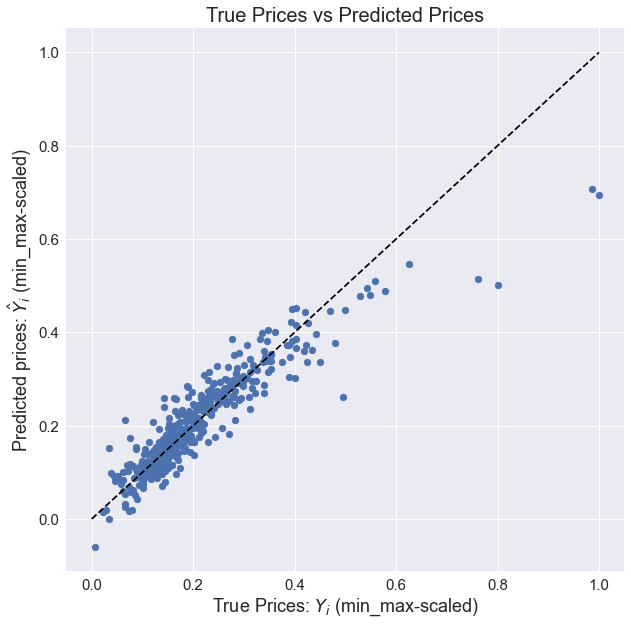

In [50]:
#we plot true prices against predicted prices
y_pred = lreg.predict(X_test)

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_test, y_pred)
ax.set_xlabel("True Prices: $Y_i$ (min_max-scaled)", fontsize=18)
ax.set_ylabel("Predicted prices: $\hat{Y}_i$ (min_max-scaled)", fontsize=18)
ax.set_title("True Prices vs Predicted Prices", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.plot([0, 1], [0, 1], '--k');

**Observation**: From the graph above we can notice how predicted prices do not lie far from the $\hat{y}$ = y line.

## 8.3 Performance of the model

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Calculate the prediction for training data
y_pred = lreg.predict(X_train)

print("MSE - training set: %5.3f"%np.sqrt(mean_squared_error(y_train, y_pred)))
print("R-squared - training set: %5.3f"% r2_score(y_train, y_pred))

MSE - training set: 0.040
R-squared - training set: 0.860


In [52]:
#Now let's see for the test data:
y_pred = lreg.predict(X_test)

print("MSE - test set: %5.3f"%np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared - test set: %5.3f"%r2_score(y_test, y_pred))

MSE - test set: 0.045
R-squared - test set: 0.849


**Observation**
- For the train set we got a good R-squared.
- For the test set the R-squared is a little bit lower but it is still good.

# 9. Ridge and Lasso Regression
*Question 11*

## 9.1. Ridge Regression
Here, doing a Ridge regression makes sense because we selected only the most relevant features. Unlike Lasso it will not help us in the feature selection. Ridge distribute the coefficient in many small values. Its main advanage it is that it reduces the variance.

In [53]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)
pred_train_ridge_reg= ridge_reg.predict(X_train)
ridge_df = pd.Series(ridge_reg.fit(X_train, y_train).coef_, index = X.columns)
print(ridge_df)

OverallQual           0.147001
YearBuilt             0.048954
YearRemodAdd          0.022221
TotalBsmtSF           0.141762
1stFlrSF              0.015420
GrLivArea             0.329211
FullBath             -0.018069
TotRmsAbvGrd         -0.024192
GarageArea            0.067167
Foundation - PConc   -0.001831
BsmtQual - Ex         0.051436
KitchenQual - Ex      0.046225
ExterQual - TA       -0.007915
KitchenQual - TA     -0.008761
dtype: float64


In [54]:
print("MSE - Training set: %5.3f" % np.sqrt(mean_squared_error(y_train, pred_train_ridge_reg)))
print("R-squared - Training set: %5.3f" % r2_score(y_train, pred_train_ridge_reg))

MSE - Training set: 0.040
R-squared - Training set: 0.859


In [55]:
# How well it does on the test set
pred_test_ridge_reg= ridge_reg.predict(X_test)
print("MSE - Test set:: %5.3f" % np.sqrt(mean_squared_error(y_test, pred_test_ridge_reg)))
print("R-squared - Test set: %5.3f" % r2_score(y_test, pred_test_ridge_reg))

MSE - Test set:: 0.046
R-squared - Test set: 0.846


**Observation**
- As we can see from above, the Mean Squared Error and the R-squared, for both train and test set, are good values. These results are very similar to the ones that we obtained with the Linear Regression.

In [56]:
#Best alpha to use for the penalty term
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1278)

ridge_reg = RidgeCV(alphas=np.linspace(0.1,1,50), cv=cv, scoring='neg_mean_absolute_error').fit(X_test, y_test)
                                             
print("%5.3f" %(ridge_reg.alpha_))

0.835


**Observation**
- We decided to import the Ridge Cross Validation function in order to fit the Ridge regression model and we used the RepeatedKFold function to perform K-fold Cross-Validation to find the optimal alpha value to use for the penalty term. We find out that the alpha value that minimizes the test MSE is 0.835.

## 9.2. Lasso Regression

Compare to Ridge, Lasso help in the feature selection. Indeed, the model aims to select the strongest explanatory variables by applying absolute penalties. Thus, Lasso will tell us if we have choosen the right features.

In [57]:
from sklearn.linear_model import Lasso

#Lasso regression coefficients
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
pred_train_lasso= lasso_reg.predict(X_train)
lasso_coef = pd.Series(lasso_reg.fit(X_train, y_train).coef_, index = X.columns)
print(lasso_coef)

OverallQual           0.135260
YearBuilt             0.022384
YearRemodAdd          0.020887
TotalBsmtSF           0.121105
1stFlrSF              0.000000
GrLivArea             0.241421
FullBath              0.000000
TotRmsAbvGrd          0.000000
GarageArea            0.065486
Foundation - PConc    0.001034
BsmtQual - Ex         0.053979
KitchenQual - Ex      0.041471
ExterQual - TA       -0.017796
KitchenQual - TA     -0.011057
dtype: float64


In [58]:
# How well did it do on the training set
print("MSE - Training set: %5.3f" % np.sqrt(mean_squared_error(y_train, pred_train_lasso)))
print("R-squared - Training set: %5.3f" % r2_score(y_train, pred_train_lasso))

MSE - Training set: 0.042
R-squared - Training set: 0.847


In [59]:
# How well it does on the test set
pred_test_lasso= lasso_reg.predict(X_test)
print("MSE - Test set: %5.3f" % np.sqrt(mean_squared_error(y_test, pred_test_lasso)))
print("R-squared - Test set: %5.3f" % r2_score(y_test, pred_test_lasso))

MSE - Test set: 0.049
R-squared - Test set: 0.821


**Observation** 
- Lasso R-squared, both for the train and the test set, are lower than the ones we found above but still good values.

In [60]:
#Check the features equal to zero
lasso_coef[lasso_coef==0]

1stFlrSF        0.0
FullBath        0.0
TotRmsAbvGrd    0.0
dtype: float64

## 9.3 Going further - Linear Regression

In order to see if we get better results, we run again the linear regression by dropping the zero coefficients that we found with Lasso.  

In [61]:
final_data2= final_data.drop(["1stFlrSF", "FullBath", "TotRmsAbvGrd"], axis=1)


#Train Test Split on X and Y data frame

y = final_data2["SalePrice"]
X = final_data2.drop(["SalePrice"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1278)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 11)
(474, 11)
(960,)
(474,)


In [62]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [63]:
lreg.coef_

array([ 0.14482774,  0.04739914,  0.02084533,  0.15954543,  0.30549225,
        0.06572895, -0.00361917,  0.05161603,  0.0453456 , -0.0070523 ,
       -0.00890883])

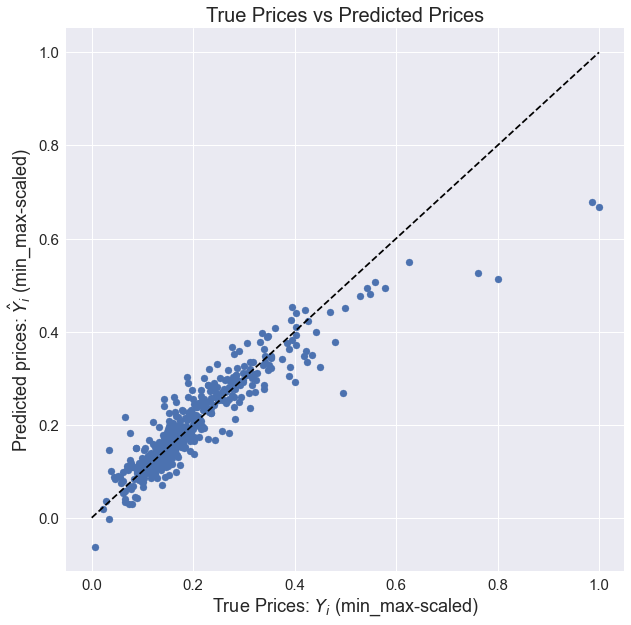

In [65]:
#we plot true prices against predicted prices
y_pred = lreg.predict(X_test)

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_test, y_pred)
ax.set_xlabel("True Prices: $Y_i$ (min_max-scaled)", fontsize=18)
ax.set_ylabel("Predicted prices: $\hat{Y}_i$ (min_max-scaled)", fontsize=18)
ax.set_title("True Prices vs Predicted Prices", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.plot([0, 1], [0, 1], '--k');

In [66]:
#Calculate the prediction for training data
y_pred = lreg.predict(X_train)

print("MSE - training set: %5.3f"%np.sqrt(mean_squared_error(y_train, y_pred)))
print("R-squared - training set: %5.3f"% r2_score(y_train, y_pred))

MSE - training set: 0.040
R-squared - training set: 0.857


In [67]:
#Now let's see for the test data:
y_pred = lreg.predict(X_test)

print("MSE - test set: %5.3f"%np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared - test set: %5.3f"%r2_score(y_test, y_pred))

MSE - test set: 0.046
R-squared - test set: 0.846


**Observation**
- For the previous linear regression on the test set (point 8), we obtained MSE = 0.045 and R-squared = 0.849.
- Now, always on the test set, we get MSE= 0.046 and R-squared = 0.846.

As you can see we obtained preatty much the same results by using less features. This means that the zero parameters we discarded are not significant for our model.

### Conclusion:
Broadly speaking the 3 models performed quite similarly. We run all the 3 regression under different scenarios, for exemple dropping features with little coefficients or without removing the features with hight P-values or dropping the zero-coefficients that we get from Lasso ("1stFlrSF","FullBath" and "TotRmsAbvGr). In all cases we got a test sample R-squared above 0.80. To conclude, we believe that our models are quite reliable predictors for this data sample.